In [1]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|█████████████████████████████████████████████████████████| 8.41M/8.41M [00:01<00:00, 8.48MB/s]


In [3]:
# Visit the Mars Temperature site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
#parse the website into a redable format
html = browser.html
soup = soup(html, 'html.parser')

In [8]:
#using pandas to read the data from the website and displaying the data
temps = pd.read_html(url)
temps = temps[0]
temps

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
#naming the columns for the DF
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [12]:
#creating the dataframe
temps_df = pd.DataFrame(temps, columns=columns)
temps_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [16]:
#check the datatypes
temps_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [20]:
#change terrestrial_time from object to datetime
from datetime import datetime
temps_df['terrestrial_date'] = pd.to_datetime(temps_df['terrestrial_date'])

In [21]:
#confirm that the terrestrial_date column is now datretime
temps_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [22]:
#end the browsing session
browser.quit()

In [57]:
#How many months are there on mars?
#mars_month = temps_df['terrestrial_date']((temps_df['2012-08-16'] - temps_df['2018-02-27'])/np.timedelta64(1, 'M'))
#mars_month = temps_df.groupby('month').count()
mars_month = temps_df.groupby("month")["month"].count()
mars_month

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [56]:
#How many martian days exsist in the data?
mars_days = temps_df['sol'].count()
mars_days

1867

In [58]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging 
#the minimum daily temperature of all the months. Plot the results as a bar chart.
mars_temps = temps_df.groupby('month')['min_temp'].mean()
mars_temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 1.0, 'Average Temp on Mars')

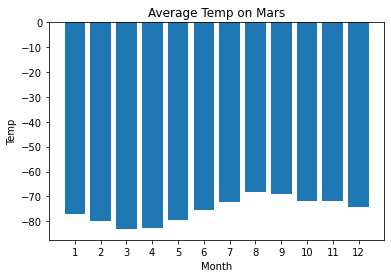

In [67]:
#Plot the high and low temperature averages by month
x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
plt.bar(x, mars_temps)
plt.xlabel("Month")
plt.ylabel("Temp")
plt.title("Average Temp on Mars")

In [68]:
#Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily 
#atmospheric pressure of all the months. Plot the results as a bar chart.
mars_pressure = temps_df.groupby('month')['pressure'].mean()
mars_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0.5, 1.0, 'Average Pressure on Mars')

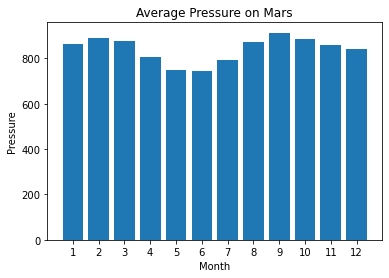

In [69]:
#Plot the high and low pressure averages by month
x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
plt.bar(x, mars_pressure)
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.title("Average Pressure on Mars")

In [70]:
#About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun 
#once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
earth_days = temps_df.groupby('month')['sol'].count()
earth_days

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: sol, dtype: int64

In [40]:
#Convert the DataFrame to a CSV
temps_df.to_csv('mars_temps.csv', index=False, encoding='utf-8')